In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In this assignment, your goal will be to experiment with some simple bandit learning algorithms
by implementing them from scratch and comparing their performance in terms of (1) the average
accumulated reward as well as (2) the proportion of time the optimal action, i.e., the one with the
highest expected reward, is taken.

You should provide a report including plots describing your results and a link to an online repository
with commented and reproducible code. You should also provide a readme file that can make it easy
for anyone to replicate the results in this assignment. Note that modern machine learning conferences
e.g., NeurIPS, require submission of documented code for reproducibility of reported results.

Each part is worth 25 marks. You will be graded on correctness, clarity and reproducibility of
your results. The assignment is due on June 13th. It may be done individually or in pairs. Both
participants in a pair will receive the same grade and no preference will be given to people working
individually or in pairs.

In [49]:
def MultiArmedBandit(n = 10, steps = 1000, method = 'greedy', Alpha = 0.1):
    Arms = n
    steps = steps
    Means = (np.random.normal(0, 1, Arms))
    epsilon = 0.5
    min_epsilon = 0.1
    decay_rate = 0.0004
    Reward_list = []
    Optimal_Action = []
    Optimal = np.argmax(Means)
    # Initialize N (Times that an action has activated)
    N = np.zeros(Arms)
    if method == 'greedy':
        # Initialize Q (Average of each action)
        Q = np.zeros(Arms)
        # Run every action once 
        Q = (np.random.normal(Means, 1, Arms))
        for step in range(steps):
            
            #Get Highest number in Q
            Action = np.argmax(Q)   
            #Get Reward
            Reward = (np.random.normal(Means[Action], 1))

            Reward_list.append(Reward)
            # Update number of N_i by 1
            N[Action] += 1
            # Update Q
            Q[Action] += (Reward - Q[Action]) / N[Action]
            #List of Rewards   
            if Action == Optimal:
                Optimal_Action.append(1)
            else:
                Optimal_Action.append(0)
        return Reward_list, Optimal_Action
    elif method == 'epsilon': 
        # Initialize Q (Average of each action)
        Q = np.zeros(Arms)
        # Run every action once 
        Q = (np.random.normal(Means, 1, Arms))
        for step in range(steps):
            # random.random() takes a value between 0 and 1
            if random.random() < epsilon: 
                # Get Random number
                Action = random.randint(0, 9)
            else:
                #Get Highest number in Q
                Action = np.argmax(Q)
            #Get Reward
            Reward = (np.random.normal(Means[Action], 1))
            Reward_list.append(Reward)
            # Update number of N_i by 1
            N[Action] += 1

            # Update Q
            Q[Action] += (Reward - Q[Action]) / N[Action]

            epsilon = max(min_epsilon, epsilon - decay_rate)
            if Action == Optimal:
                Optimal_Action.append(1)
            else:
                Optimal_Action.append(0)
        return Reward_list, Optimal_Action
    elif method == 'optimistic':
        Q = np.ones(Arms) * 10
        # Run every action once 
        for step in range(steps):
            
            #Get Highest number in Q
            Action = np.argmax(Q)   
            #Get Reward
            Reward = (np.random.normal(Means[Action], 1))

            Reward_list.append(Reward)
            # Update number of N_i by 1
            N[Action] += 1
            # Update Q
            Q[Action] += (Reward - Q[Action]) / N[Action]
            if Action == Optimal:
                Optimal_Action.append(1)
            else:
                Optimal_Action.append(0)
        return Reward_list, Optimal_Action  
    elif method == 'gradient':
        H = np.zeros(Arms)
        Avg_reward = 0
        for step in range(steps):
            H_Exp = np.exp(H)
            Policy = H_Exp / np.sum(H_Exp)
            Action = np.random.choice(Arms, p = Policy)
            Reward = np.random.normal(Means[Action], 1)
            Avg_reward += (Reward - Avg_reward) / (step + 1)
            for j in range(Arms):
                if j == Action:
                    H[j] += Alpha * (Reward - Avg_reward) * (1 - Policy[j])
                else:
                    H[j] -= Alpha * (Reward - Avg_reward) * Policy[j]
            
            Reward_list.append(Reward)
            if Action == Optimal:
                Optimal_Action.append(1)
            else:
                Optimal_Action.append(0)
        return Reward_list, Optimal_Action 
    else:
        print("Wrong method")
        return 0 
            
    return 0

### Part 1

We start by looking at a simple bandit problem with stationary reward distributions. Consider the socalled k-armed testbed, with k = 10, with normally distributed rewards. Generate a set of ten means µ1, . . . , µ10 from a N(0, 1) distribution and suppose that the arms 1 through 10 have N(µi, 1) reward distributions where i = 1, . . . , 10. You goal is to learn the action values corresponding to each of the 10 arms, i.e., the expected rewards q∗ (a) for a = 1, . . . 10 using the different methods we discussed for doing so.

• greedy with non-optimistic initial values. Initialize the action value estimates to 0 and use the incremental implementation of the simple average method.

• epsilon-greedy with different choices of epsilon. Here, you will need to explain how you choose the value of ϵ. One option is to use pilot runs: to take a few example bandit problems and try a few settings of epsilon on these problems to track the evolution of the rewards curve and picking one that gives good results

• optimistic starting values with a greedy approach. You may assume you know the means of each of the reward distributions to help you set the optimistic initial values.

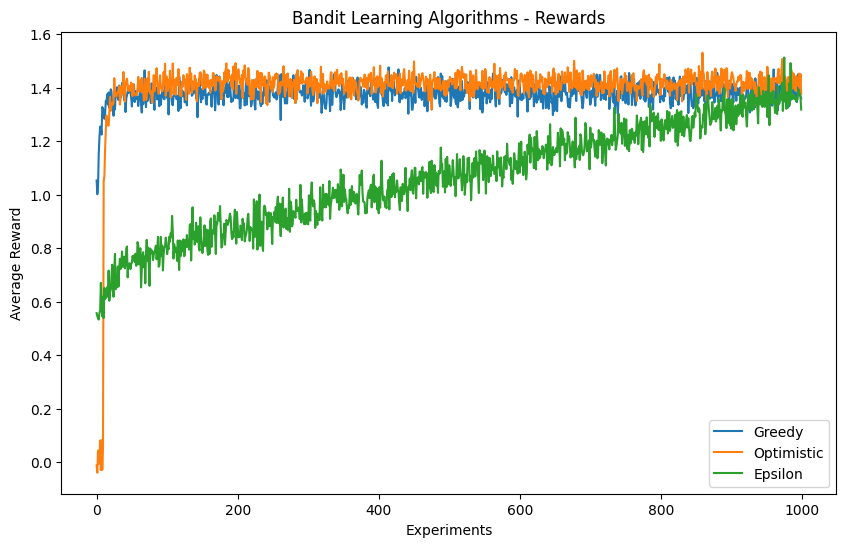

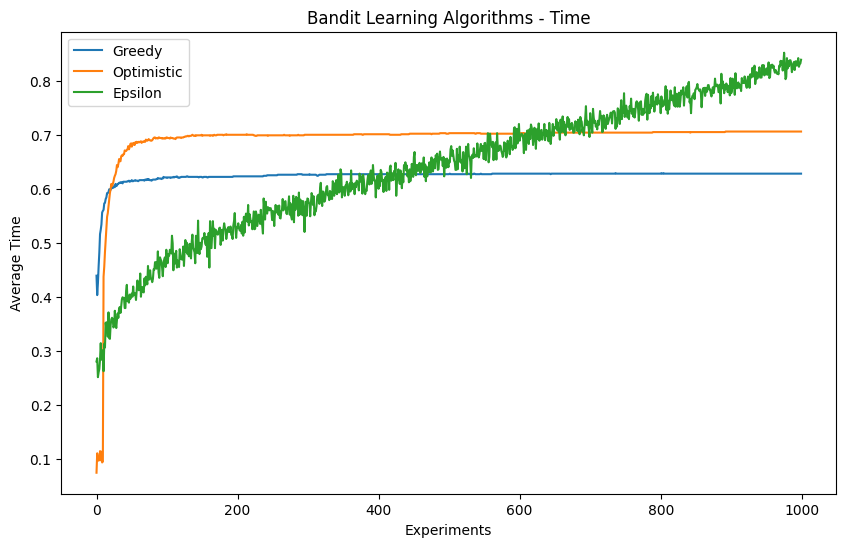

In [60]:
experiments = 1000
Rewards_Greedy = np.zeros((1000, 1000))
Rewards_Optimistic = np.zeros((1000, 1000))
Rewards_Epsilon = np.zeros((1000, 1000))
Time_Greedy = np.zeros((1000, 1000))
Time_Optimistic = np.zeros((1000, 1000))
Time_Epsilon = np.zeros((1000, 1000))

for i in range(0,experiments):
    Reward_list, time_avg = MultiArmedBandit(method = 'greedy')
    Rewards_Greedy[i] = Reward_list
    Time_Greedy[i] = time_avg
    Reward_list, time_avg = MultiArmedBandit(method = 'optimistic')
    Rewards_Optimistic[i] = Reward_list
    Time_Optimistic[i] = time_avg
    Reward_list, time_avg = MultiArmedBandit(method = 'epsilon')
    Rewards_Epsilon[i] = Reward_list
    Time_Epsilon[i] = time_avg

plt.figure(figsize=(10, 6))
plt.plot(np.mean(Rewards_Greedy, axis=0), label='Greedy')
plt.plot(np.mean(Rewards_Optimistic, axis=0), label='Optimistic')
plt.plot(np.mean(Rewards_Epsilon, axis=0), label='Epsilon')
plt.xlabel('Experiments')
plt.ylabel('Average Reward')
plt.title('Bandit Learning Algorithms - Rewards')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.mean(Time_Greedy, axis=0), label='Greedy')
plt.plot(np.mean(Time_Optimistic, axis=0), label='Optimistic')
plt.plot(np.mean(Time_Epsilon, axis=0), label='Epsilon')
plt.xlabel('Experiments')
plt.ylabel('Average Time')
plt.title('Bandit Learning Algorithms - Time')
plt.legend()
plt.show()



• gradient bandit algorithm. Try different learning rates α and determine a good one through some pilot runs.


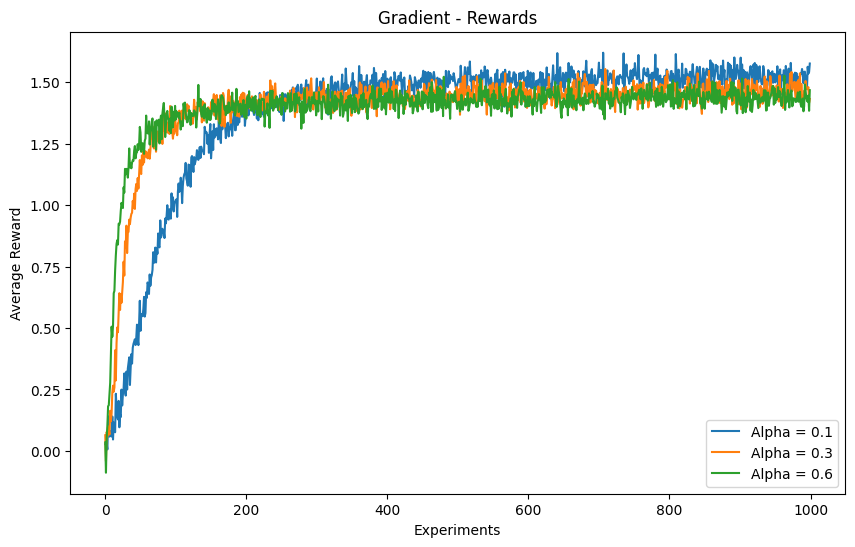

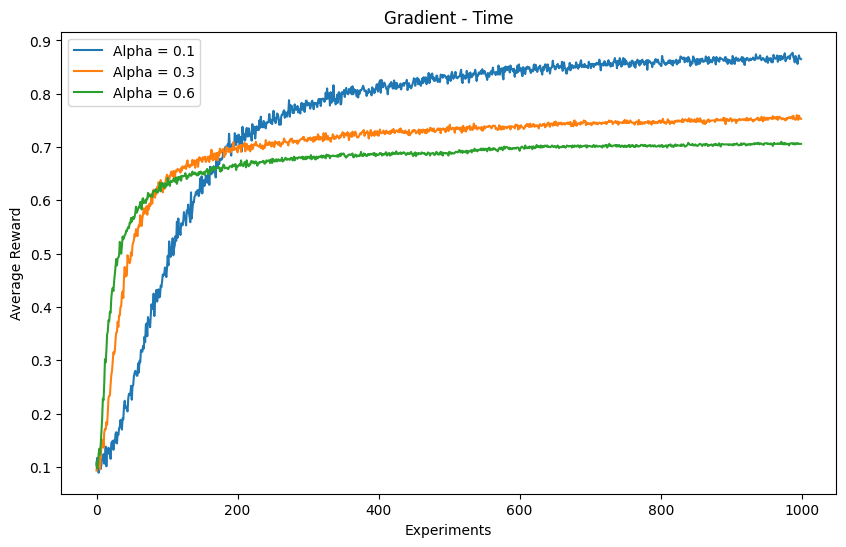

In [59]:
experiments = 1000
Rewards_Gradient_1 = np.zeros((1000, 1000))
Time_Gradient_1 = np.zeros((1000, 1000))
Rewards_Gradient_2 = np.zeros((1000, 1000))
Time_Gradient_2 = np.zeros((1000, 1000))
Rewards_Gradient_3 = np.zeros((1000, 1000))
Time_Gradient_3 = np.zeros((1000, 1000))

for i in range(0,experiments):
    Reward_list, time_avg = MultiArmedBandit(method = 'gradient', Alpha = 0.1)
    Rewards_Gradient_1[i] = Reward_list
    Time_Gradient_1[i] = time_avg
    Reward_list, time_avg = MultiArmedBandit(method = 'gradient', Alpha = 0.3)
    Rewards_Gradient_2[i] = Reward_list
    Time_Gradient_2[i] = time_avg
    Reward_list, time_avg = MultiArmedBandit(method = 'gradient', Alpha = 0.6)
    Rewards_Gradient_3[i] = Reward_list
    Time_Gradient_3[i] = time_avg

plt.figure(figsize=(10, 6))
plt.plot(np.mean(Rewards_Gradient_1, axis=0), label='Alpha = 0.1')
plt.plot(np.mean(Rewards_Gradient_2, axis=0), label='Alpha = 0.3')
plt.plot(np.mean(Rewards_Gradient_3, axis=0), label='Alpha = 0.6')
plt.xlabel('Experiments')
plt.ylabel('Average Reward')
plt.title('Gradient - Rewards')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.mean(Time_Gradient_1, axis=0), label='Alpha = 0.1')
plt.plot(np.mean(Time_Gradient_2, axis=0), label='Alpha = 0.3')
plt.plot(np.mean(Time_Gradient_3, axis=0), label='Alpha = 0.6')
plt.xlabel('Experiments')
plt.ylabel('Average Reward')
plt.title('Gradient - Time')
plt.legend()
plt.show()